# Linear Regression

Linear regression model is aiming for making prediction on numerical/continuous variable by minimizing the least square error.

Let the $X_i$ denotes the independent variable and $Y_i$ denotes the dependent variable, thus a pair of data can be expressed by $(X_i, Y_i)$, where $i$ denotes the index of data sample.

### Simple Linear Regression
The goal in this method is to predict continuous variable of $Y_i$ with only one independent variable of $X_i$. Simple linear regression model mathematically formulated as follows.

$$ Y_i = \beta_0 + \beta_1 X_i + \epsilon_i $$

where 

$\beta_0$ = $Y$ intercept for the population 

$\beta_1$ = slope for the population 

$\epsilon_i$ = random error in $Y$ for observation $i$

### Multiple Linear Regression
Extend the simple linear regression, where in real world data setting, most of the times we would like to consider more than one independent variable for predicting the dependent variable. In this method, it is assuming a linear relationship between each independent variable and the dependent variable.

Multiple linear regression model with $n$ independent variables by $j=1,2,...,n$ mathematically formulated as follows.

$$ Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + ... + \beta_n X_{ni} +\epsilon_i $$

where 

$\beta_0$ = $Y$ intercept for the population 

$\beta_n$ = slope (the change in $Y$ per unit change in $X_n$, taking into account the effect of others $X$ 

$\epsilon_i$ = random error in $Y$ for observation $i$









==========================================================================================================================

Let's see each model example

## Simple Linear Regression Example

We took dataset from https://www.kaggle.com/datasets/rohankayan/years-of-experience-and-salary-dataset . 

In this dataset, we have to predict the salary of an individual person based on their years of experience.
In this case we have only one independent continuous (numerical) variable (years of experience) and one dependent continuous variable (salary), thus we would like to build simple linear regression model with R.


First, let see the data

In [1]:
salarydata=read.csv("/kaggle/input/years-of-experience-and-salary-dataset/Salary_Data.csv")
head(salarydata)

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642


**Load the libraries**



In [2]:
library(tidyverse)
library(caret)
library(MASS)
library(lmtest)
library(olsrr)
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘olsrr’


The fol

**1. Check whether the variables have linear relationship**

From the plot below, we can see they have linear relationship which mean we can safe to perform linear regression for this dataset.

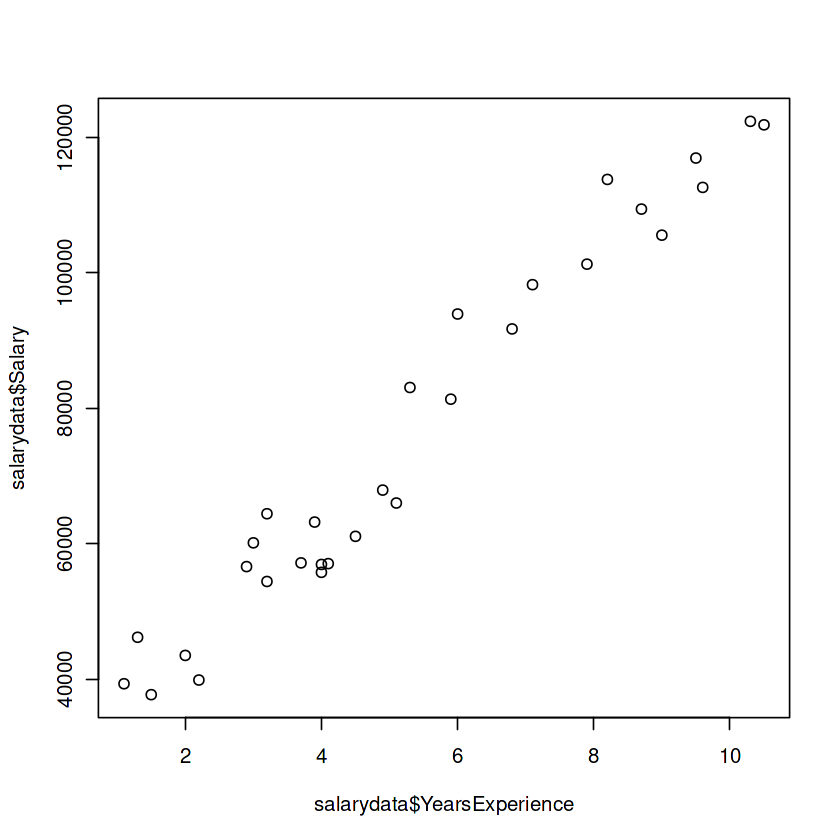

In [3]:
plot(salarydata$YearsExperience, salarydata$Salary)

Remember, our linear regression is built based on certain assumptions shall be met:

1. linearity: the relationship between variables is linear. Can be measured by pearson correlation or plot the residual on the vertical axis against the corresponding $X_i$ values on the horizontal axis.
2. Normality: errors shall be normally distributed.  You can use QQ plot of residuals or Shapiro-wilk-test on residuals.
3. Homoscedasticity (Equal variance) : Errors must have constant variance. Plot residuals with $X_i$.
4. Independence of errors: Errors must be independent. You can measure the autocorrelation with Durbin-Watson Statistic.



Let see the linearity relationship beside the plot above with pearson correlation.

In [4]:
cor.test(salarydata$YearsExperience , salarydata$Salary)


	Pearson's product-moment correlation

data:  salarydata$YearsExperience and salarydata$Salary
t = 24.95, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9542949 0.9897078
sample estimates:
      cor 
0.9782416 


The correlation shows 0.9782416 and p-value (2.2e-16)<0.05, means that our variables have significant correlation (highly linearly related).

**2. Let's build our model.**

To evaluate our model, we need to split our data into training and testing data.

The common ratio use in the splitting is train:test =80%:20% or 75%:25%.

Let us split the data with 80%: 20% for train:test.

In [7]:
set.seed(123)
training.samples <- salarydata$Salary %>%
  createDataPartition(p = 0.75, list = FALSE)
train.data  <- salarydata[training.samples, ]
test.data <- salarydata[-training.samples, ]


In [6]:
print(training.samples)

      Resample1
 [1,]         2
 [2,]         3
 [3,]         4
 [4,]         5
 [5,]         6
 [6,]         7
 [7,]         8
 [8,]         9
 [9,]        10
[10,]        11
[11,]        12
[12,]        13
[13,]        14
[14,]        16
[15,]        17
[16,]        18
[17,]        19
[18,]        20
[19,]        21
[20,]        23
[21,]        24
[22,]        25
[23,]        26
[24,]        27
[25,]        28
[26,]        29


In [8]:
dim (train.data) # see the dimension of train data 26.2 means we have 26 rows(subjects) and 2 columns
dim(test.data)

[1] 24  2

[1] 6 2

In [9]:
# Fit model

model <- lm(Salary ~ YearsExperience , data = train.data)

summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7490.5 -3915.3  -418.5  2551.9 11971.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      25643.0     2646.5    9.69 2.14e-09 ***
YearsExperience   9387.6      446.9   21.01 4.76e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5711 on 22 degrees of freedom
Multiple R-squared:  0.9525,	Adjusted R-squared:  0.9504 
F-statistic: 441.3 on 1 and 22 DF,  p-value: 4.761e-16


Summary from the result

see the coefficients part.
1. our regression line is : $y=9387.6 (x) + 25643$
2. standard error: used for confidence interval $9387.6  ± 1.96(446.9) = [a,a]$, we can say we are 95% confident that the actual slope is between $a$ and $a$

3. t-value: coefficient divided by the standard error, the larger t-statistic is better, which we more certain that the coefficient is not zero.

4. Pr(>|t|) (p-value) : our both slope and intercept are below 0.05 which is significant. Strong evidence that the coefficients in this model are not zero.

5. Multiple R-squared used for simple linear regression (one predictor):  0.9525 means our model explain 95.25% variations within salary.

6. Adjusted R-squared value used in multiple linear regression, shows what percentage of the variation within our dependent variable that all predictors are explaining. 

7. F-stat: larger F-statistic generally indicates that the null hypothesis should be rejected.
p-value < 0.05 : have at least one coefficient in your model that isn’t zero.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Assumption check

Normality assumption 


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.9489, p-value = 0.2564


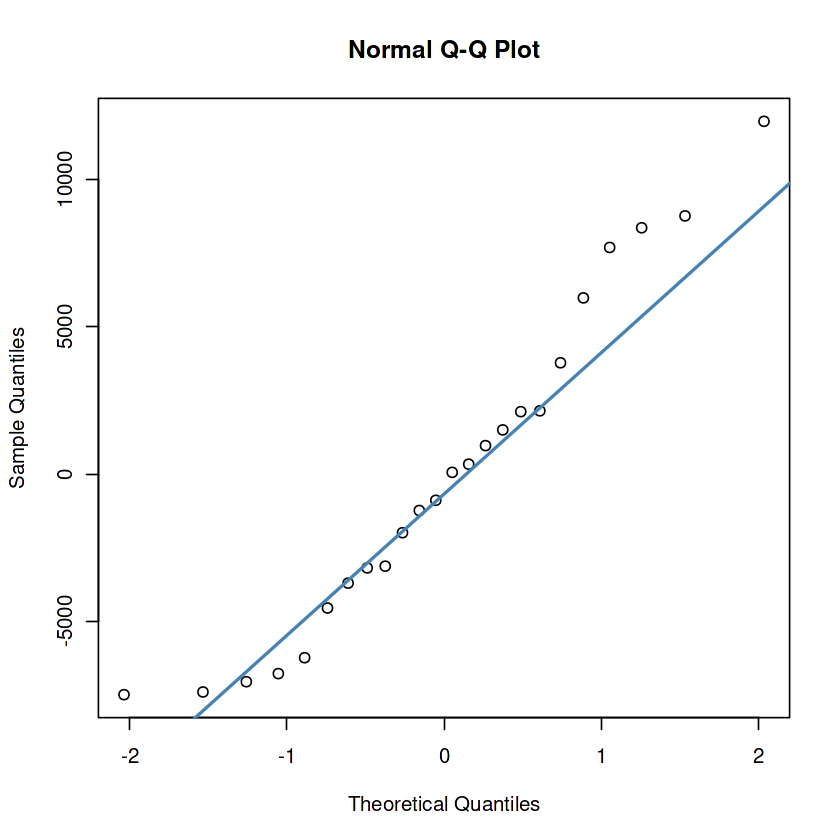

In [10]:
# Visualization
qqnorm(model$residuals)
qqline(model$residuals , col = "steelblue", lwd = 2)  

# Statistical Test
shapiro.test(model$residuals)

Homoscedasticity
Visualization : Residuals vs fitted values plot.

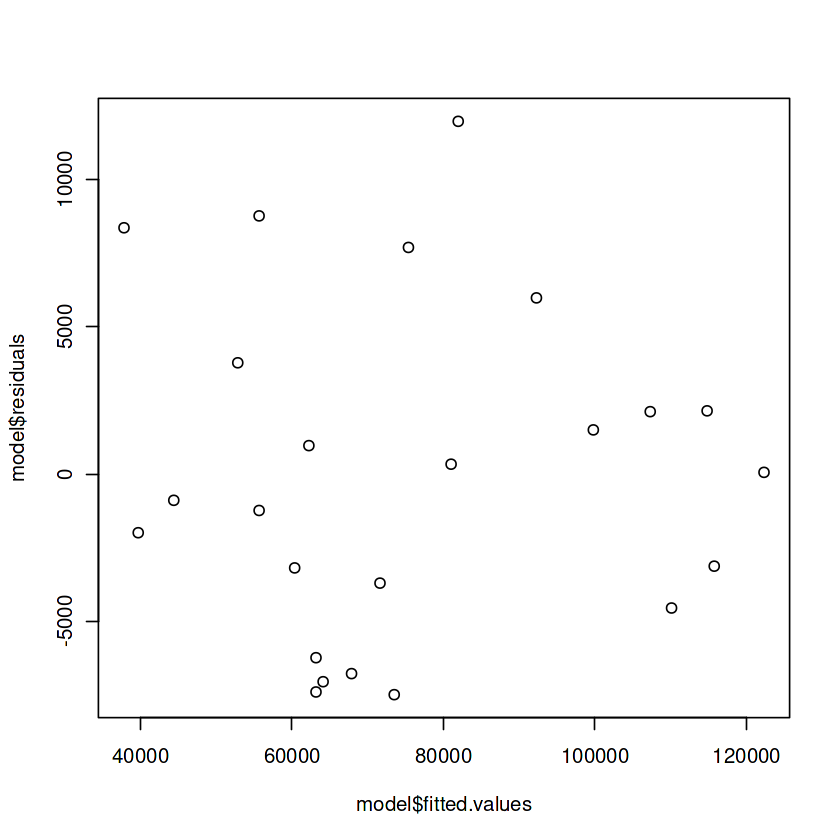

In [11]:
# Visualization
plot(model$fitted.values , model$residuals)


Auto-correlation Durbin-watson Test 

In [12]:
dwtest(model,  alternative = c("two.sided"))


	Durbin-Watson test

data:  model
DW = 1.5536, p-value = 0.1744
alternative hypothesis: true autocorrelation is not 0


p-value (0.1349) > 0.05, Accept null hypothesis, i.e., Errors are uncorrelated.

**Test on the testing dataset**

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.9713714,6170.818,5318.947


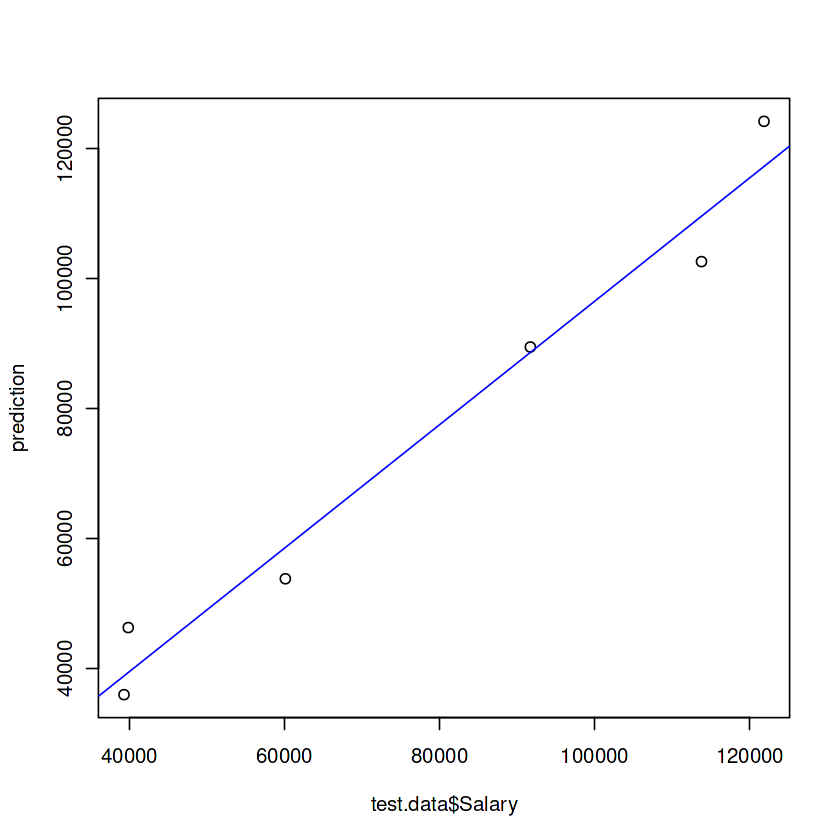

In [14]:
# Making prediction
prediction <- model %>% predict(test.data)

# Visualization
plot(test.data$Salary , prediction)
abline(lm(prediction ~ Salary, data = test.data), col = "blue")

# Statistical Measure
data.frame( R2 = R2(prediction, test.data$Salary),
            RMSE = RMSE(prediction, test.data$Salary),
            MAE = MAE(prediction, test.data$Salary))

In [15]:
print(prediction)

        1         5         7        21        24        30 
 35969.28  46295.60  53805.65  89478.38 102620.97 124212.36 


R2 = 0.9701604, mean a best fit.

# Multiple Linear Regression Example


In this case, we would like to predict house price with other independent variables.

First, let's import the data

In [ ]:
library(tidyverse)
library(caret)
library(ggplot2)
library(car)

In [16]:
houseprice =read.csv("/kaggle/input/real-estate-price-prediction/Real estate.csv")
summary(houseprice)
head(houseprice)

       No        X1.transaction.date  X2.house.age   
 Min.   :  1.0   Min.   :2013        Min.   : 0.000  
 1st Qu.:104.2   1st Qu.:2013        1st Qu.: 9.025  
 Median :207.5   Median :2013        Median :16.100  
 Mean   :207.5   Mean   :2013        Mean   :17.713  
 3rd Qu.:310.8   3rd Qu.:2013        3rd Qu.:28.150  
 Max.   :414.0   Max.   :2014        Max.   :43.800  
 X3.distance.to.the.nearest.MRT.station X4.number.of.convenience.stores
 Min.   :  23.38                        Min.   : 0.000                 
 1st Qu.: 289.32                        1st Qu.: 1.000                 
 Median : 492.23                        Median : 4.000                 
 Mean   :1083.89                        Mean   : 4.094                 
 3rd Qu.:1454.28                        3rd Qu.: 6.000                 
 Max.   :6488.02                        Max.   :10.000                 
  X5.latitude     X6.longitude   Y.house.price.of.unit.area
 Min.   :24.93   Min.   :121.5   Min.   :  7.60           

,No,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


We can change the column name to make it easier for the following process afterwards

In [18]:
library(dplyr)

In [19]:
colnames(houseprice) <- c('No','transactiondate','age','MRTdistance','numofconvenience','latitude','longitude','price')
houseprice<-houseprice[-1]
head(houseprice)

,transactiondate,age,MRTdistance,numofconvenience,latitude,longitude,price
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [ ]:
install.packages("summarytools")


In [20]:
library(summarytools)
print(summarytools::dfSummary(houseprice), method = "render")

Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)


Attaching package: ‘summarytools’


The following object is masked from ‘package:tibble’:

    view


Warning message in png(png_loc <- tempfile(fileext = ".png"), width = 150 * graph.magnif, :
“unable to open connection to X11 display ''”
Warning message in png(png_loc <- tempfile(fileext = ".png"), width = 150 * graph.magnif, :
“unable to open connection to X11 display ''”
Warning message in png(png_loc <- tempfile(fileext = ".png"), width = 150 * graph.magnif, :
“unable to open connection to X11 display ''”
Warning message in png(png_loc <- tempfile(fileext = ".png"), width = 150 * graph.magnif, :
“unable to open connection to X11 display ''”
Warning message in png(png_loc <- tempfile(fileext = ".png"), width = 150 * graph.magnif, :
“unable to open connection to X11 display ''”
Warning message in png(png_loc

Shiny tags cannot be represented in plain text (need html)

Distance to metro station is highly skewed distribution, which the tail region may act as an outlier. Thus, we need to transform the skewed data into gaussian distribution.

Before that, let's see the correlation with house price.

In [21]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




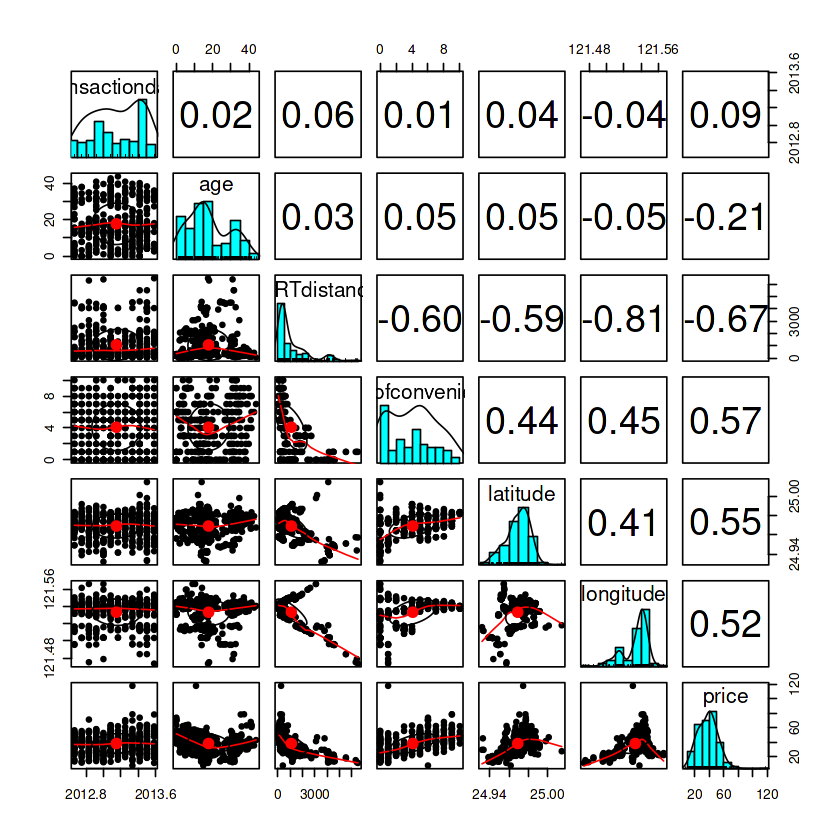

In [22]:
pairs.panels(houseprice,cex=0.75)

1. There are 4 variables that has at least 0.5 correlation with the house price, with one MRT distance is negatively correlated.
2. The house age and transaction date has weak correlation with the house price.
3. Therre is multicollinearity issue, between MRT distance and num of convenience store. Also between MRT distance and longitude.

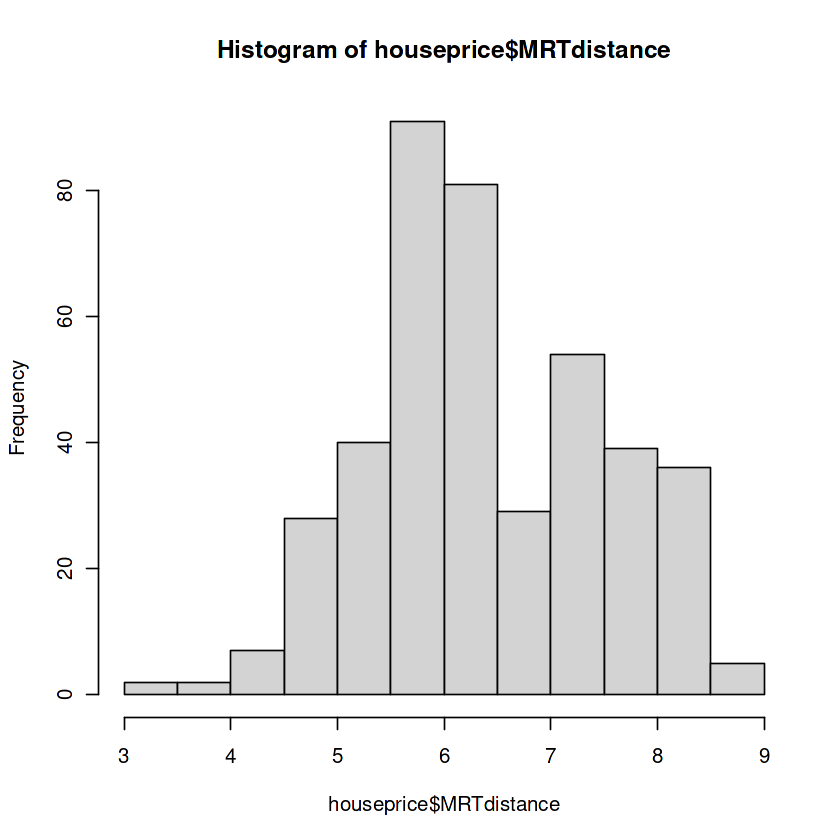

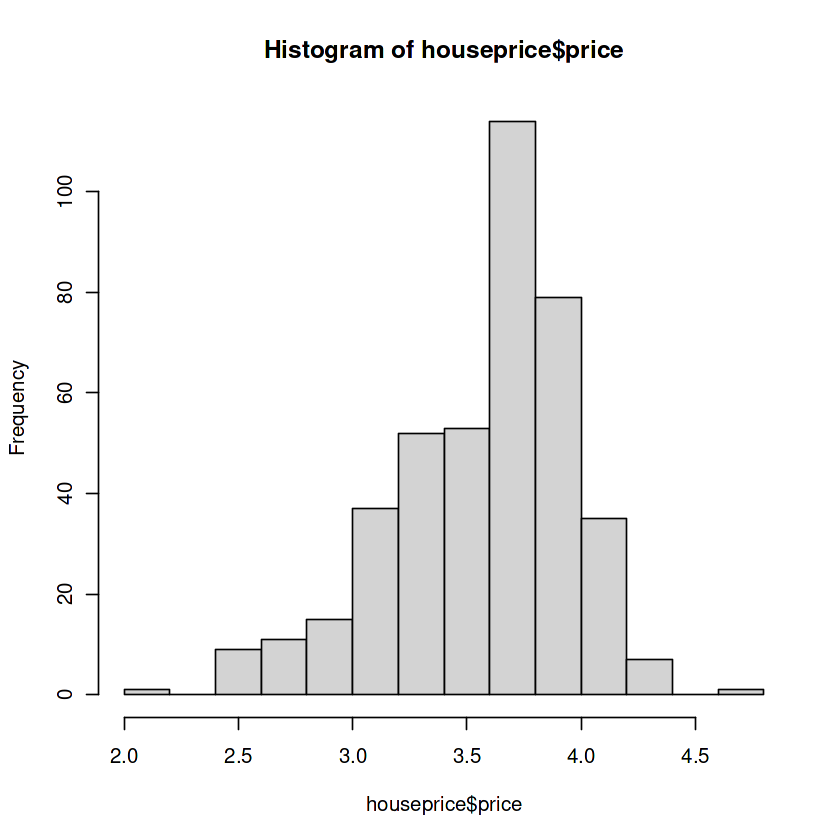

In [23]:
houseprice$MRTdistance<-log(houseprice$MRTdistance)
hist(houseprice$MRTdistance)

houseprice$price<-log(houseprice$price)
hist(houseprice$price)

In [24]:
set.seed(123)
traininghouse.samples <- houseprice$price %>%
  createDataPartition(p = 0.8, list = FALSE)
trainhouse.data  <- houseprice[traininghouse.samples, ]
testhouse.data <- houseprice[-traininghouse.samples, ]

dim(trainhouse.data)
dim(testhouse.data)

[1] 332   7

[1] 82  7

Usually we use the Akaike Information Standard (AIC) to choose the correct statistical model. The model with the lowest AIC is considered the "optimal" model. Here, we will use the step function to find an optimal model based on AIC values:

In [25]:
#Train 
reg <- lm(price ~ ., data = trainhouse.data)
step(reg, direction = "both")


Start:  AIC=-1023.18
price ~ transactiondate + age + MRTdistance + numofconvenience + 
    latitude + longitude

                   Df Sum of Sq    RSS      AIC
<none>                          14.601 -1023.18
- numofconvenience  1    0.2215 14.823 -1020.18
- longitude         1    0.2483 14.849 -1019.58
- transactiondate   1    0.6426 15.244 -1010.88
- age               1    1.5910 16.192  -990.84
- latitude          1    4.3121 18.913  -939.27
- MRTdistance       1    4.6558 19.257  -933.29



Call:
lm(formula = price ~ transactiondate + age + MRTdistance + numofconvenience + 
    latitude + longitude, data = trainhouse.data)

Coefficients:
     (Intercept)   transactiondate               age       MRTdistance  
      -8.658e+02         1.583e-01        -6.228e-03        -1.710e-01  
numofconvenience          latitude         longitude  
       1.227e-02         1.059e+01         2.365e+00  


In [28]:
regression_model <- lm(price ~ transactiondate + age + 
    MRTdistance  +numofconvenience+latitude+longitude, data = trainhouse.data)

In [29]:
summary(regression_model) 



Call:
lm(formula = price ~ transactiondate + age + MRTdistance + numofconvenience + 
    latitude + longitude, data = trainhouse.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61292 -0.10462  0.01536  0.10614  0.96784 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -8.658e+02  1.447e+02  -5.983 5.78e-09 ***
transactiondate   1.583e-01  4.187e-02   3.782 0.000185 ***
age              -6.228e-03  1.047e-03  -5.951 6.90e-09 ***
MRTdistance      -1.710e-01  1.680e-02 -10.180  < 2e-16 ***
numofconvenience  1.226e-02  5.523e-03   2.221 0.027064 *  
latitude          1.059e+01  1.081e+00   9.797  < 2e-16 ***
longitude         2.365e+00  1.006e+00   2.351 0.019320 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.212 on 325 degrees of freedom
Multiple R-squared:  0.721,	Adjusted R-squared:  0.7158 
F-statistic: 139.9 on 6 and 325 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


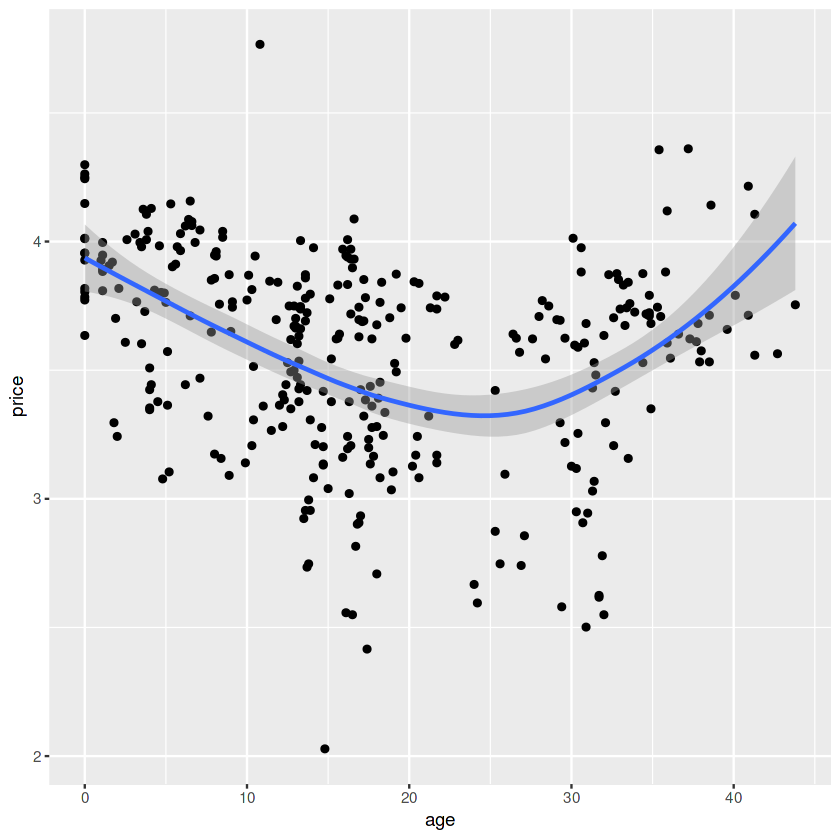

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


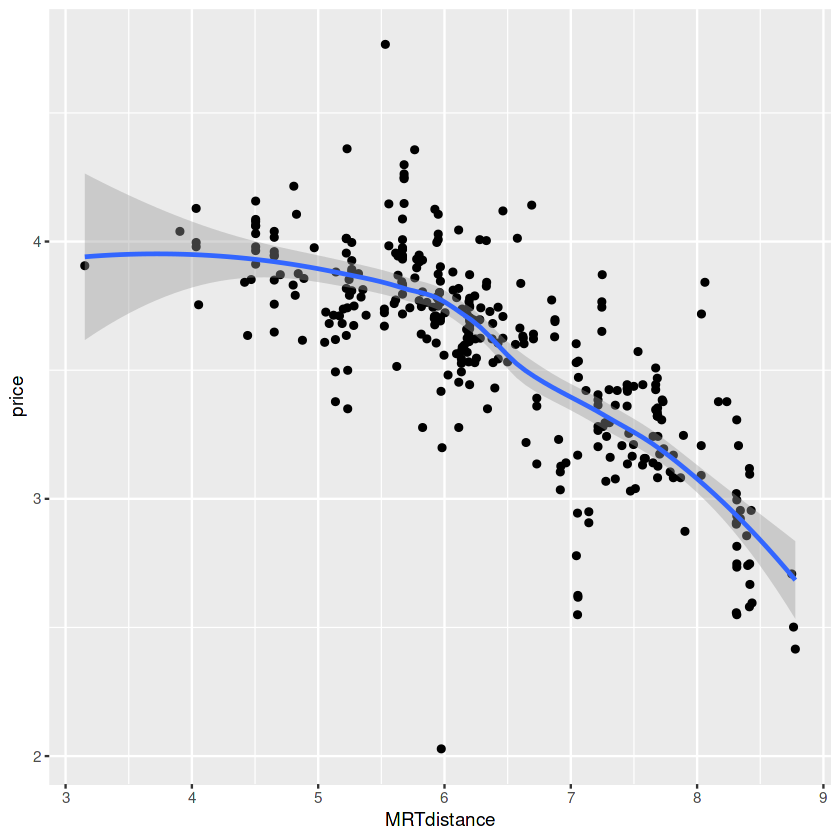

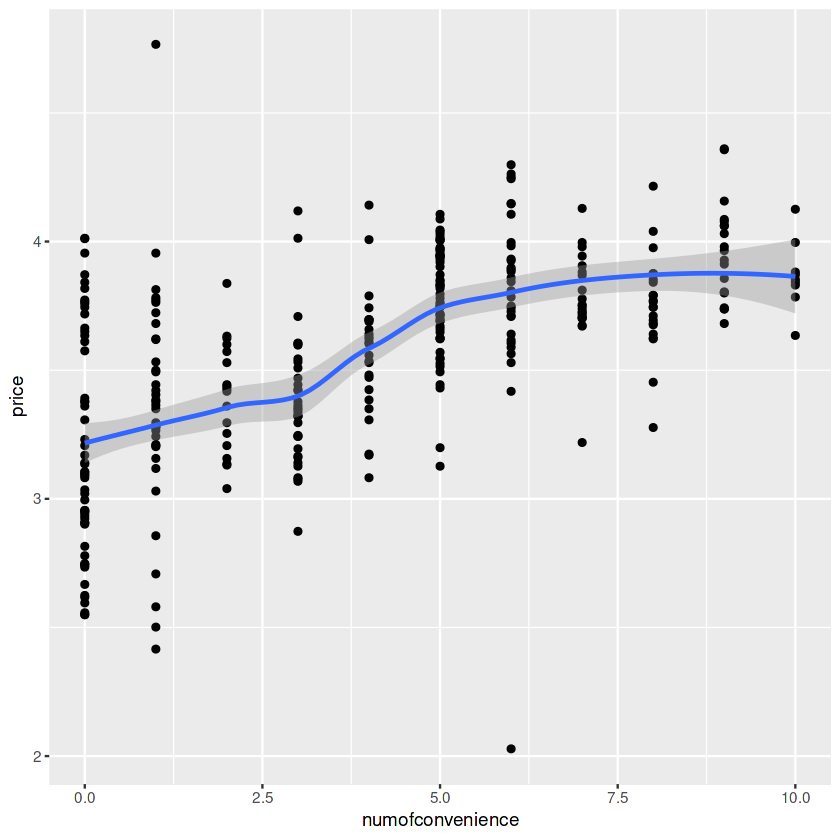

In [33]:
ggplot(trainhouse.data, aes(age, price) ) +
geom_point() +
stat_smooth()

ggplot(trainhouse.data, aes(MRTdistance, price) ) +
geom_point() +
stat_smooth()

ggplot(trainhouse.data, aes(numofconvenience, price) ) +
geom_point() +
stat_smooth()

# Polynomial (Quadratic) linear regression ==> chapter 15

$Y=\beta_0 +\beta_1 X_1^2+\beta_2 X_2^2+\beta_3 X_3+e$

In [35]:
polynomial_training_model <- lm(price ~ transactiondate + I(age^2) + 
    I(MRTdistance^2)  +numofconvenience+latitude+longitude, data = trainhouse.data)
summary(polynomial_training_model)


Call:
lm(formula = price ~ transactiondate + I(age^2) + I(MRTdistance^2) + 
    numofconvenience + latitude + longitude, data = trainhouse.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64590 -0.10610  0.00703  0.10698  0.94466 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -7.264e+02  1.521e+02  -4.776 2.71e-06 ***
transactiondate   1.584e-01  4.256e-02   3.722 0.000233 ***
I(age^2)         -1.232e-04  2.599e-05  -4.739 3.22e-06 ***
I(MRTdistance^2) -1.492e-02  1.395e-03 -10.696  < 2e-16 ***
numofconvenience  1.135e-02  5.582e-03   2.034 0.042779 *  
latitude          9.812e+00  1.108e+00   8.858  < 2e-16 ***
longitude         1.372e+00  1.069e+00   1.283 0.200306    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2155 on 325 degrees of freedom
Multiple R-squared:  0.7115,	Adjusted R-squared:  0.7062 
F-statistic: 133.6 on 6 and 325 DF,  p-value: < 2.2e-16


ASSUMPTIONS

Let's check for all of the assumptions.

1. Linearity: The relationship between the independent and dependent variables must be linear.

In [37]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




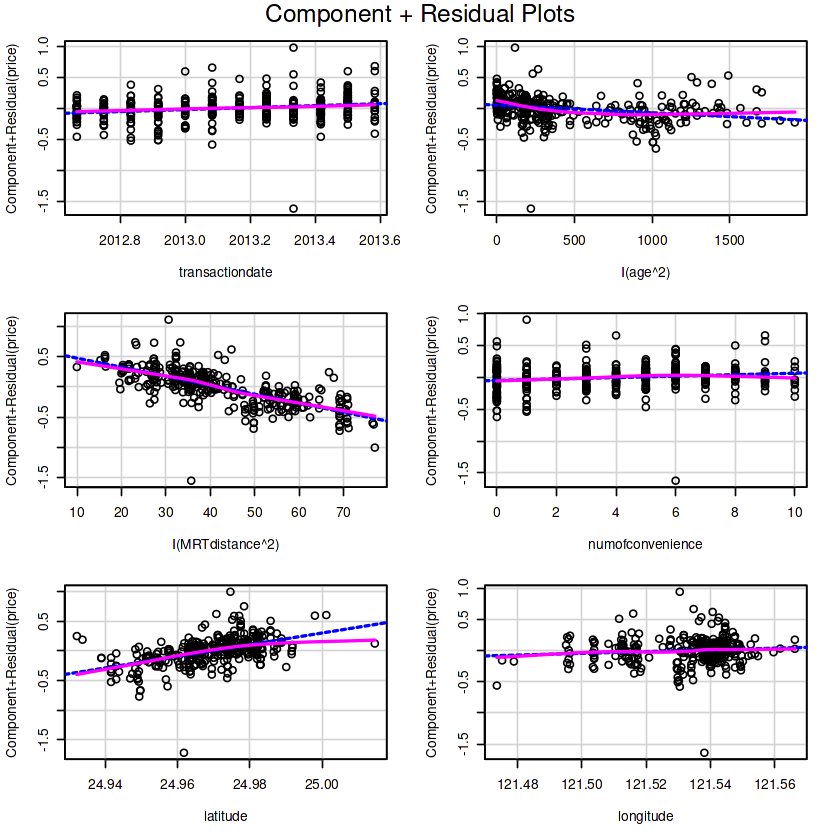

In [38]:
crPlots(polynomial_training_model)

2. Normality of residuals: residuals should be normally distributed.
It's clear that we are close to a normal distribution. However, there are some observations that could cause problems: from the plot the observations with the highest residuals (in absolute value) are 114 and 271.

114 271 
 88 212

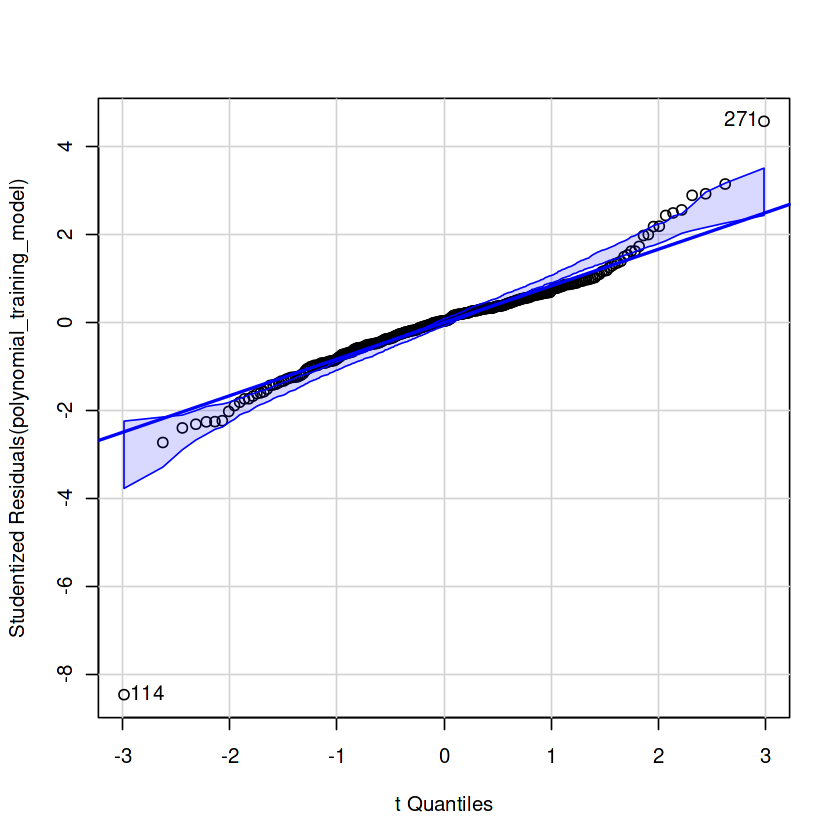

In [39]:
qqPlot(polynomial_training_model)

Let's rerun our model after deleting this

In [40]:
trainhouse.data$resid <- polynomial_training_model$residuals
which(abs(trainhouse.data$resid)>0.5)

[1]  34  88  99 153 173 212 215 246 261 304

In [44]:
real_estate_clean2 <- trainhouse.data[-c(34,88,99,153,173,212,215,246,261,304),]

In [46]:
polynomialfinal_training_model <- lm(price ~ transactiondate + I(age^2) + 
    I(MRTdistance^2)  +numofconvenience+latitude+longitude, data = real_estate_clean2)
summary(polynomialfinal_training_model) 


Call:
lm(formula = price ~ transactiondate + I(age^2) + I(MRTdistance^2) + 
    numofconvenience + latitude + longitude, data = real_estate_clean2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45925 -0.09458  0.01522  0.10082  0.49506 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -6.933e+02  1.187e+02  -5.841 1.29e-08 ***
transactiondate   1.409e-01  3.362e-02   4.191 3.61e-05 ***
I(age^2)         -1.510e-04  2.078e-05  -7.268 2.90e-12 ***
I(MRTdistance^2) -1.523e-02  1.107e-03 -13.757  < 2e-16 ***
numofconvenience  1.147e-02  4.457e-03   2.574   0.0105 *  
latitude          9.738e+00  8.821e-01  11.039  < 2e-16 ***
longitude         1.405e+00  8.355e-01   1.682   0.0936 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1673 on 315 degrees of freedom
Multiple R-squared:  0.8061,	Adjusted R-squared:  0.8024 
F-statistic: 218.3 on 6 and 315 DF,  p-value: < 2.2e-16


check normality assumption

286 390 
216 301


	Shapiro-Wilk normality test

data:  polynomialfinal_training_model$residuals
W = 0.98835, p-value = 0.01103


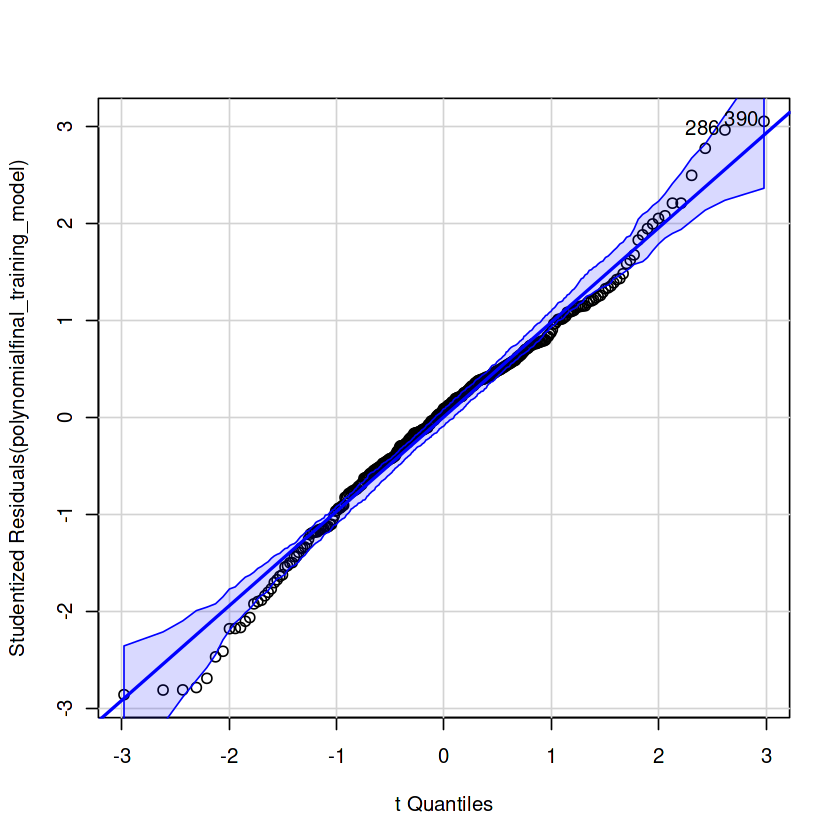

In [47]:
qqPlot(polynomialfinal_training_model)
shapiro.test(polynomialfinal_training_model$residuals)

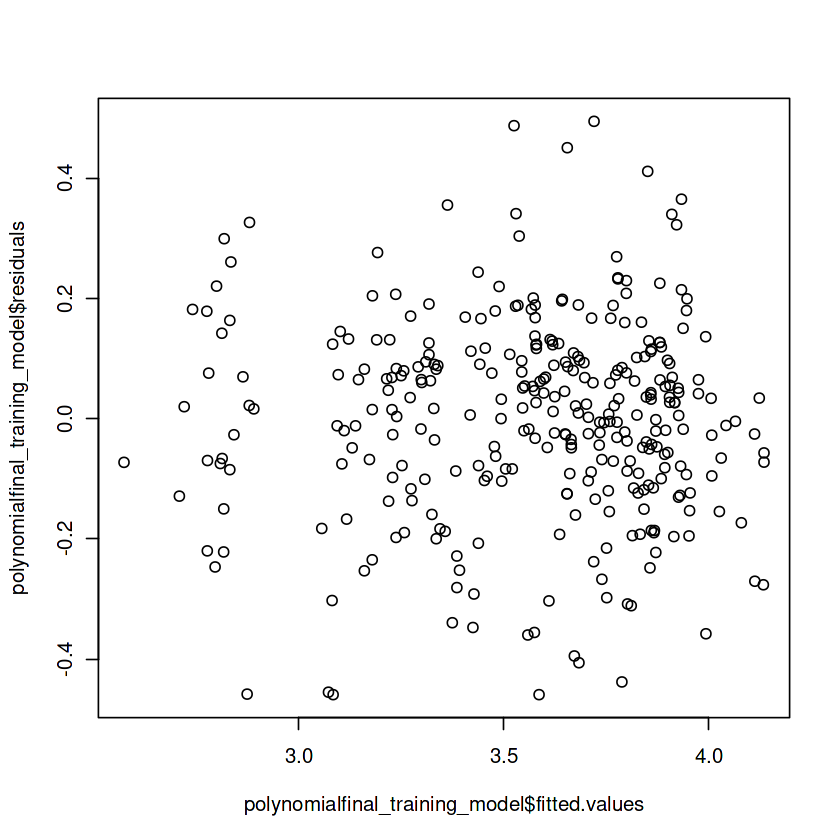

In [48]:
# Visualization
plot(polynomialfinal_training_model$fitted.values , polynomialfinal_training_model$residuals)

In [49]:
library(lmtest)
dwtest(polynomialfinal_training_model,  alternative = c("two.sided"))


	Durbin-Watson test

data:  polynomialfinal_training_model
DW = 2.0126, p-value = 0.9021
alternative hypothesis: true autocorrelation is not 0


p-value > 0.05, Accept null hypothesis, i.e., Errors are uncorrelated.

test into the testing data set,we have R^2 0.73 which shows significant result.

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.7330525,0.1936181,0.1361986


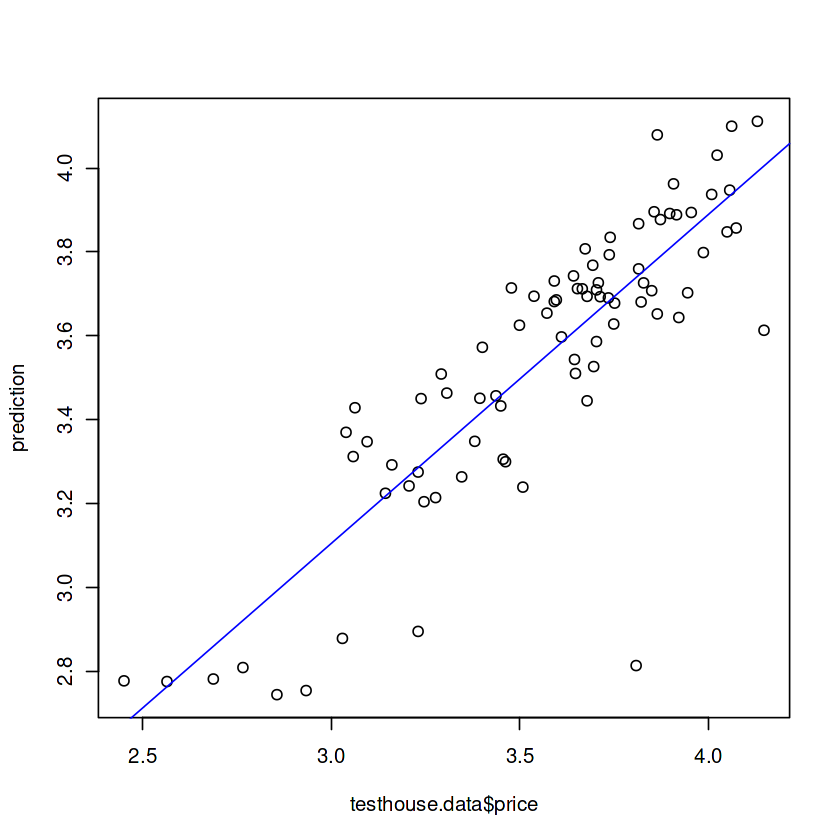

In [50]:
# Making prediction
prediction <- polynomialfinal_training_model %>% predict(testhouse.data)

# Visualization
plot(testhouse.data$price , prediction)
abline(lm(prediction ~ price, data = testhouse.data), col = "blue")

# Statistical Measure
data.frame( R2 = R2(prediction, testhouse.data$price),
            RMSE = RMSE(prediction, testhouse.data$price),
            MAE = MAE(prediction, testhouse.data$price))

In [ ]:
print(prediction)